## Settings & Check

In [ ]:
# 2. 필요한 라이브러리 설치
# %pip install -q kaggle

# 3. Kaggle API 설정
# import os

!which python
!pip show torch
import torch
print(torch.version.cuda) 
!echo $PATH
!echo $LD_LIBRARY_PATH

/home/gpu_04/.conda/envs/DL/bin/python
Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /home/gpu_04/.conda/envs/DL/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: torchaudio, torchvision
12.1
/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/usr/local/cuda-12.2/bin:/usr/local/cuda-12.2/bin:/home/gpu_04/.conda/envs/DL/bin:/opt/anaconda3/condabin:/home/gpu_04/.vscode-server/cli/servers/Stable-f1a4fb101478ce6ec82fe9627c43efbf9e98c813/server/bin/rem

In [1]:
import torch
print("PyTorch 버전:", torch.__version__)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())
print("현재 디바이스:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")
print("CUDA 버전:", torch.version.cuda if torch.cuda.is_available() else "None")

# GPU 메모리 단편화 문제 완화
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# GPU 캐시 비우기
import torch
import gc

# 1. 불필요한 변수 삭제
# del variable

# 2. 가비지 컬렉터 실행
gc.collect()

# 3. PyTorch 캐시 메모리 해제
torch.cuda.empty_cache()

# 4. 메모리 사용 상태 출력
print(f"Allocated memory: {torch.cuda.memory_allocated() / (1024 ** 2):.2f} MB")
print(f"Reserved memory: {torch.cuda.memory_reserved() / (1024 ** 2):.2f} MB")

PyTorch 버전: 2.5.1+cu121
CUDA 사용 가능 여부: True
현재 디바이스: NVIDIA RTX A6000
CUDA 버전: 12.1
Allocated memory: 0.00 MB
Reserved memory: 0.00 MB


In [3]:
import os
import subprocess
import tensorflow as tf

# Kaggle API 설정
def setup_kaggle():
    kaggle_path = os.path.expanduser("./")
    kaggle_json_path = os.path.join(kaggle_path, "kaggle.json")

    # kaggle.json 파일이 있는지 확인하고 설정
    if not os.path.exists(kaggle_json_path):
        print("Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.")
        print("API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.")
    else:
        os.makedirs(kaggle_path, exist_ok=True)  # .kaggle 디렉토리 생성
        os.chmod(kaggle_json_path, 0o600)  # kaggle.json 권한 설정
        print("Kaggle API 설정이 완료되었습니다.")

# 데이터셋 다운로드 및 압축 해제
def download_flickr30k():
    data_dir = "/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data"
    os.makedirs(data_dir, exist_ok=True)

    # 다운로드할 경로로 이동
    os.chdir(data_dir)

    # Flickr8k 데이터셋 다운로드
    try:
        subprocess.run(["kaggle", "datasets", "download", "-d", "hsankesara/flickr-image-dataset"], check=True)
    except subprocess.CalledProcessError:
        print("Kaggle 데이터셋 다운로드에 실패했습니다. Kaggle API가 제대로 설정되었는지 확인하세요.")
        return None

    # 압축 해제
    try:
        subprocess.run(["unzip", "-q", "flickr-image-dataset.zip"], check=True)
        print(f"데이터가 {data_dir}에 다운로드되었습니다.")
    except subprocess.CalledProcessError:
        print("데이터셋 압축 해제에 실패했습니다.")

    return data_dir

# GPU 확인
def check_gpu():
    gpu_devices = tf.config.list_physical_devices('GPU')
    if gpu_devices:
        print(f"사용 가능한 GPU: {len(gpu_devices)}개")
        for gpu in gpu_devices:
            print(f"  - {gpu}")
        print("\nGPU 사용이 가능합니다!")
    else:
        print("GPU가 감지되지 않았습니다.")

# 실행 예시
if __name__ == "__main__":
    # Kaggle 설정
    setup_kaggle()

    # 데이터 다운로드
    data_dir = download_flickr30k()

    # GPU 확인
    check_gpu()

    print("\n모든 설정이 완료되었습니다!")


2024-11-22 00:59:14.083133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732204754.105924 2282669 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732204754.112955 2282669 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 00:59:14.138935: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Kaggle API 키 파일(kaggle.json)을 ~/.kaggle에 배치해 주세요.
API 키는 https://www.kaggle.com/account > Create New API Token에서 다운로드할 수 있습니다.
Dataset URL: https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset
License(s): CC0-1.0
flickr-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
데이터가 /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data에 다운로드되었습니다.
사용 가능한 GPU: 1개
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

GPU 사용이 가능합니다!

모든 설정이 완료되었습니다!


In [2]:
import pandas as pd

# caption file 경로
caption_file = "/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/results.csv"

# csv file load
captions = pd.read_csv(caption_file, sep='|', names=['image_name', 'comment_number', 'comment'], skiprows=1)

# 샘플 데이터 확인
print(captions.head())

       image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .  


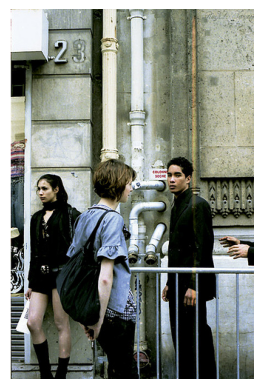

Caption 1:  An asian man wearing a black suit stands near a dark-haired woman and a brown-haired woman .
Caption 2:  Three people are standing outside near large pipes and a metal railing .
Caption 3:  A young woman walks past two young people dressed in hip black outfits .
Caption 4:  A woman with a large purse is walking by a gate .
Caption 5:  Several people standing outside a building .


In [3]:
from PIL import Image
import matplotlib.pyplot as plt

def display_image_with_caption(image_name):
    # 이미지 파일 경로
    image_path = f"/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/{image_name}"

    # 이미지 열기
    img = Image.open(image_path)

    # 해당 이미지의 캡션 불러오기
    image_captions = captions[captions['image_name'] == image_name]['comment'].values

    # 이미지와 캡션 출력
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # 캡션 출력
    for i, caption in enumerate(image_captions):
        print(f"Caption {i+1}: {caption}")

# 이미지 파일 중 하나와 캡션을 출력해보기
sample_image = captions['image_name'].unique()[8]  # 첫 번째 이미지 파일명
display_image_with_caption(sample_image)

In [4]:
import os
os.chdir(os.path.join(os.getcwd(), "./ImageCaptioning/flickr30k_data"))
# os.chdir(os.path.join(os.getcwd()))
print("New working directory:", os.getcwd())


New working directory: /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data


In [5]:
# 이미지 경로 설정
image_dir = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/'
all_image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

## Data Preprocessing

In [18]:
import torchvision.transforms as transforms
from PIL import Image
import os
import torch

# 이미지 전처리 함수
def image_preprocessing(image_paths):
    # preprocessing pipeline 정의
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    processed_images = []
    image_names = []
    for i, image_path in enumerate(image_paths, 1):  # 인덱스 i로 반복 시작
        image = Image.open(image_path).convert('RGB')  # RGB 변환
        processed_image = preprocess(image)            # 전처리 적용
        processed_images.append(processed_image)
        image_names.append(os.path.basename(image_path))

        # 1000개씩 처리 완료 시 진행 상황 출력
        if i % 1000 == 0:
            print(f"{i} images processed...")

    # 전처리 이미지를 텐서로 변환하여 저장
    processed_images_tensor = torch.stack(processed_images)
    return processed_images_tensor, image_names

# run image preprocessing
processed_images, image_names = image_preprocessing(all_image_paths)

# save processed images tensor and image names
output_file = './processed_images.pt'
torch.save((processed_images, image_names), output_file)
print(f"Processed images and image names saved to {output_file}")

1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...
6000 images processed...
7000 images processed...
8000 images processed...
9000 images processed...
10000 images processed...
11000 images processed...
12000 images processed...
13000 images processed...
14000 images processed...
15000 images processed...
16000 images processed...
17000 images processed...
18000 images processed...
19000 images processed...
20000 images processed...
21000 images processed...
22000 images processed...
23000 images processed...
24000 images processed...
25000 images processed...
26000 images processed...
27000 images processed...
28000 images processed...
29000 images processed...
30000 images processed...
31000 images processed...
Processed images and image names saved to ./processed_images.pt


In [ ]:
import re
import os
import torch
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_selected_captions(captions, max_length=30):
    # 1. 텍스트를 소문자로 변환
    lowered_captions = [caption.lower() for caption in captions]

    # 2. Keras Tokenizer를 사용 (기본 필터 유지)
    tokenizer = Tokenizer(oov_token='<UNK>')  # 기본 필터 사용
    tokenizer.fit_on_texts(lowered_captions)  # dictionary 생성

    # <sos>, <eos> Token을 vocabulary에 추가
    word_index = tokenizer.word_index
    word_index['<sos>'] = len(word_index) + 1
    word_index['<eos>'] = len(word_index) + 1

    sos_token = word_index['<sos>']
    eos_token = word_index['<eos>']

    # 3. 각 caption을 정수 시퀀스로 변환하고 시작/종료 토큰 추가
    caption_sequences = tokenizer.texts_to_sequences(lowered_captions)
    caption_sequences = [[sos_token] + seq + [eos_token] for seq in caption_sequences]

    # 4. 패딩 처리
    padded_captions = pad_sequences(caption_sequences, maxlen=max_length, padding='post', value=0)

    return padded_captions, word_index

# 캡션 파일 경로
caption_file = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/results.csv'

# 이미지 이름 집합 생성
selected_image_names = set(image_names)

# 이미지 이름과 캡션 쌍을 저장할 리스트
image_caption_pairs = []
with open(caption_file, 'r') as f:
    csv_reader = csv.reader(f, delimiter='|')  # '|' 구분자로 설정
    next(csv_reader)  # 헤더 건너뛰기
    for row in csv_reader:
        if len(row) == 3:  # 행에 정확히 3개의 열이 있는지 확인
            image_name, comment_number, comment = row[0].strip(), row[1].strip(), row[2].strip()
            if image_name in selected_image_names:  # 선택된 이미지에 해당하면
                image_caption_pairs.append((image_name, comment))
        else:
            print(f"잘못된 행 건너뜀: {row}")

# 캡션과 이미지 이름 리스트 생성
captions_list = [caption for _, caption in image_caption_pairs]
image_names_list = [image_name for image_name, _ in image_caption_pairs]

# 캡션 전처리
padded_captions, word_index = preprocess_selected_captions(captions_list)

# 전처리된 캡션 데이터 저장
output_caption_file = './processed_captions.pt'
torch.save((padded_captions, word_index, image_names_list), output_caption_file)

# 결과 확인
print("전처리된 캡션 (패딩 포함):", padded_captions[:3])
print("단어 사전 크기:", len(word_index))
print("단어 인덱스 예시:", {word: word_index[word] for word in ['dog', '<sos>', '<eos>'] if word in word_index})


전처리된 캡션 (패딩 포함): [[18314    12    21   326    10  2038    88   187    16    62   159    23
    324    71     3     4   490 18315     0     0     0     0     0     0
      0     0     0     0     0     0]
 [18314    12    21    20   710    13    54    79   194  1427 18315     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [18314    12    29     3    46   223    13    31     3     2   490 18315
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]
단어 사전 크기: 18315
단어 인덱스 예시: {'dog': 32, '<sos>': 18314, '<eos>': 18315}


## Implement of Model Structure

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import psutil
import time
import timm

# GPU 사용 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# 데이터 불러오기
processed_images_tensor, image_names = torch.load('./processed_images.pt', map_location='cpu')
padded_captions, word_index, image_names_list = torch.load('./processed_captions.pt', map_location='cpu')  # 전처리된 캡션, 단어 사전, 이미지 이름 리스트
vocab_size = len(word_index) + 1  # 단어 사전 크기 + padding

# # ResNet50 모델 로드 및 특징 사전 추출
# resnet50 = models.resnet50(pretrained=True)
# resnet50 = torch.nn.Sequential(*list(resnet50.children())[:-1])  # Feature Extractor로 사용
# resnet50 = resnet50.to(device)  # GPU로 이동
# resnet50.eval()

# ViT model load 및 feature extractor로 사용
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_model.eval()
vit_model = vit_model.to(device)

# # 이미지 특징 추출 및 이미지 이름과 매핑  - ResNet50 모델 사용
# image_dataset = TensorDataset(processed_images_tensor)
# image_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

# image_features = []
# for batch in image_loader:
#     images = batch[0].to(device)
#     with torch.no_grad():
#         features = resnet50(images).squeeze(-1).squeeze(-1).cpu()  # (batch_size, 2048)
#         image_features.append(features)
#         torch.cuda.empty_cache()  # 캐시 메모리 해제
# image_features_tensor = torch.cat(image_features)  # 배치 결과 병합

# 이미지 특징 추출 및 이미지 이름과 매핑 - ViT 모델 사용
image_dataset = TensorDataset(processed_images_tensor)
image_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

image_features = []
for batch in image_loader:
    images = batch[0].to(device)
    with torch.no_grad():
        features = vit_model.forward_features(images)  # (batch_size, seq_len + 1, embed_dim)
        cls_token = features[:, 0, :]  # 클래스 토큰 추출 (batch_size, embed_dim)
        features = cls_token.cpu()
        image_features.append(features)
        torch.cuda.empty_cache()
image_features_tensor = torch.cat(image_features)
# 처리된 image features 저장 => loaded_features, loaded_image_names = torch.load('./image_features.pt', map_location='cpu') 와 같이 사용
torch.save((image_features_tensor, image_names), './image_features.pt')

# 이미지 이름과 특징을 매핑
image_feature_dict = {image_name: feature for image_name, feature in zip(image_names, image_features_tensor)}

# 이미지 특징 리스트 생성
image_features_list = [image_feature_dict[image_name] for image_name in image_names_list]
image_features_tensor = torch.stack(image_features_list)

# Dataset 클래스 수정
class ImageCaptionDataset(Dataset):
    def __init__(self, features, captions, image_names):
        self.features = features
        self.captions = captions
        self.image_names = image_names

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        # 사전 추출된 ResNet 특징 사용
        return self.features[idx], torch.tensor(self.captions[idx], dtype=torch.long), self.image_names[idx]

# Dataset 객체 생성
dataset = ImageCaptionDataset(image_features_tensor, padded_captions, image_names_list)

# 데이터셋 크기 계산
train_size = int(0.9 * len(dataset))  # 90% 학습 데이터
val_size = int(0.07 * len(dataset))   # 7% 검증 데이터
test_size = len(dataset) - train_size - val_size  # 나머지 3% 테스트 데이터

# 데이터셋 분리
torch.manual_seed(0)  # 항상 일정한 결과를 얻기 위해 시드 설정
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# DataLoader 초기화
def collate_fn(batch):
    features = torch.stack([item[0] for item in batch])
    captions = torch.stack([item[1] for item in batch])
    image_names = [item[2] for item in batch]
    return features, captions, image_names

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)  # 학습 데이터
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)     # 검증 데이터
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)   # 테스트 데이터

# 데이터셋 크기 출력
print(f"Total Dataset Size: {len(dataset)}")
print(f"Training Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

Using device: cuda


/tmp/ipykernel_3568558/638952518.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  processed_images_tensor, image_names = torch.load('./processed_images.pt', map_location

Total Dataset Size: 158915
Training Dataset Size: 143023
Validation Dataset Size: 11124
Test Dataset Size: 4768


In [96]:
# 2. Transformer 기반 이미지 캡셔닝 모델 정의
class ImageCaptioningTransformer(nn.Module):
    def __init__(self, feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length):
        super(ImageCaptioningTransformer, self).__init__()
        
        self.feature_embed = nn.Linear(feature_dim, embed_dim)
        self.word_embedding = nn.Embedding(vocab_size, embed_dim)
        self.position_embedding = nn.Embedding(max_length, embed_dim)
        
        decoder_layer = nn.TransformerDecoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.fc = nn.Linear(embed_dim, vocab_size)

    def forward(self, image_features, captions):
        batch_size, seq_len = captions.size()
        
        # 이미지 특징 임베딩 (2048 차원 -> embed_dim 차원)
        image_features = self.feature_embed(image_features).unsqueeze(1)  # (batch_size, 1, embed_dim)
        
        # 캡션 임베딩 및 위치 임베딩
        captions_embed = self.word_embedding(captions)  # (batch_size, seq_len, embed_dim)
        positions = torch.arange(0, seq_len).unsqueeze(0).expand(batch_size, seq_len).to(captions.device)
        captions_embed += self.position_embedding(positions)

        # Transformer 디코더에 이미지 특징과 마스크를 입력
        tgt_mask = self.generate_square_subsequent_mask(seq_len).to(captions.device)
        transformer_out = self.transformer_decoder(tgt=captions_embed.permute(1, 0, 2), 
                                                   memory=image_features.permute(1, 0, 2),
                                                   tgt_mask=tgt_mask)
        
        outputs = self.fc(transformer_out.permute(1, 0, 2))
        return outputs

    def generate_square_subsequent_mask(self, sz):
        mask = torch.triu(torch.ones(sz, sz), 1)
        mask = mask.masked_fill(mask == 1, float('-inf'))
        return mask

In [102]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# 3. 모델 초기화 및 학습 설정
feature_dim = 768  # ViT's output Dimension
embed_dim = 768
num_heads = 12
hidden_dim = 3072  # embed_dim * 4
num_layers = 6
max_length = 30
learning_rate = 1e-4

model = ImageCaptioningTransformer(feature_dim, embed_dim, num_heads, hidden_dim, vocab_size, num_layers, max_length)
model = model.to(device)  # GPU로 이동
criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

/home/gpu_04/.conda/envs/DL/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## 학습 진행 및 진행 추이 확인

In [103]:
import logging
import time
import torch
from torch.cuda.amp import GradScaler, autocast

# 로깅 설정
logging.basicConfig(
    filename='training.log',  # 로그 파일 이름
    level=logging.INFO,  # 로그 수준
    format='%(asctime)s - %(levelname)s - %(message)s'  # 로그 포맷
)
logger = logging.getLogger()

def train_model(
    model, 
    train_loader, 
    val_loader, 
    num_epochs, 
    start_epoch=0, 
    loss_history=None, 
    accuracy_history=None, 
    val_loss_history=None, 
    val_accuracy_history=None
):
    
    model.train()
    
    # 이전 기록이 없으면 빈 리스트로 초기화
    if loss_history is None:
        loss_history = []
    if accuracy_history is None:
        accuracy_history = []
    if val_loss_history is None:
        val_loss_history = []
    if val_accuracy_history is None:
        val_accuracy_history = []
        
    # early stopping을 위한 변수 초기화
    best_val_loss = float('inf')
    patience_counter = 0
    patience = 5  # Early Stopping을 위한 patience 설정

    for epoch in range(start_epoch, num_epochs):
        # Training Metrics
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        epoch_start = time.time()

        scaler = torch.amp.GradScaler()   # Mixed Precision Training 사용

        for image_features, captions, _ in train_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)

            with torch.autocast(device_type='cuda'):  # Mixed Precision Training
                outputs = model(image_features, captions[:, :-1])
                loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            
            optimizer.zero_grad()
            scaler.scale(loss).backward()   # Mixed Precision Training
            scaler.step(optimizer)  # Mixed Precision Training
            scaler.update()  # Mixed Precision Training

            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

        # 에폭 평균 손실 및 정확도 계산 (Training)
        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions

        # 결과 저장
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        # Validation 평가
        val_loss, val_accuracy = evaluate_model(model, val_loader)
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_accuracy)
        
        # Scheduler에 Validation Loss 전달
        scheduler.step(val_loss)
        
        # Early Stopping 조건 확인
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # 모델의 현재 상태 저장
            best_model_path = '/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/check3/best_model.pt'
            torch.save(model.state_dict(), best_model_path)
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                # Early Stopping 시 Best Model Checkpoint 저장
                best_checkpoint = {
                    'epoch': epoch + 1,
                    'model_state_dict': torch.load(best_model_path),  # Best Model 가중치 로드
                    'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
                    'train_loss_history': loss_history,  # 학습 손실 기록
                    'val_loss_history': val_loss_history,  # 검증 손실 기록
                    'train_acc_history': accuracy_history,  # 학습 정확도 기록
                    'val_acc_history': val_accuracy_history  # 검증 정확도 기록
                }
                best_checkpoint_path = f'check2/best_checkpoint_flickr8k_imgcap.pth'
                torch.save(best_checkpoint, best_checkpoint_path)
                print(f"Best checkpoint saved successfully as {best_checkpoint_path}!")
                break  # 학습 중단
            
        # 로그 메시지 출력
        epoch_end = time.time()
        log_message = (f"Epoch [{epoch+1}/{num_epochs}], "
                       f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                       f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
                       f"Time: {epoch_end - epoch_start:.2f}s")
        logger.info(log_message)

        # GPU 사용량 로깅
        gpu_usage = log_gpu_usage()
        logger.info(gpu_usage)
        
        # 학습 Checkpoint 저장
        if (epoch + 1) % 5 == 0 or (epoch + 1) == 2:   # epoch 2는 잘 돌아가는 지 테스트용
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}, "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, "
                  f"Time: {epoch_end - epoch_start:.2f}s")
            
            # GPU 사용량 출력
            log_gpu_usage()
            
            checkpoint = {
                'epoch': num_epochs,
                'model_state_dict': model.state_dict(),  # 모델 가중치
                'optimizer_state_dict': optimizer.state_dict(),  # Optimizer 상태
                'train_loss_history': loss_history,  # 학습 손실 기록
                'val_loss_history': val_loss_history,  # 검증 손실 기록
                'train_acc_history': accuracy_history,  # 학습 정확도 기록
                'val_acc_history': val_accuracy_history  # 검증 정확도 기록
            }
            file_name = f'check2/checkpoint{epoch+1}_flickr8k_imgcap.pth'
            torch.save(checkpoint, file_name)
            print(f"Checkpoint saved successfully as {file_name}!")
        #----
    return loss_history, accuracy_history, val_loss_history, val_accuracy_history

# validation evaluation 함수
def evaluate_model(model, val_loader):
    """
    Validation 평가 함수
    
    Args:
        model: 평가할 모델
        val_loader: 검증용 DataLoader 객체
    
    Returns:
        val_loss: 평균 Validation 손실
        val_accuracy: Validation 정확도
    """
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    
    with torch.no_grad():
        for image_features, captions, _ in val_loader:
            image_features = image_features.to(device)
            captions = captions.to(device)
            
            outputs = model(image_features, captions[:, :-1])  # (batch_size, seq_len, vocab_size)
            loss = criterion(outputs.view(-1, vocab_size), captions[:, 1:].reshape(-1))
            total_loss += loss.item()
            
            # 정확도 계산
            predicted_tokens = outputs.argmax(-1)  # (batch_size, seq_len)
            correct_predictions += (predicted_tokens == captions[:, 1:]).sum().item()
            total_predictions += captions[:, 1:].numel()  # 총 단어 개수

    # 평균 Loss 및 Accuracy 계산
    val_loss = total_loss / len(val_loader)
    val_accuracy = correct_predictions / total_predictions

    model.train()  # 학습 모드로 복구
    return val_loss, val_accuracy

# GPU 모니터링 함수
def log_gpu_usage():
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_max_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # MB 단위
        gpu_load = torch.cuda.memory_reserved(device) / (1024 ** 2)  # 현재 예약된 메모리
        # print(f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB")
        return f"GPU Memory Usage: {gpu_memory:.2f} MB, Max Memory: {gpu_max_memory:.2f} MB, Reserved: {gpu_load:.2f} MB"
    else:
        print("No GPU available.")

In [ ]:
# 학습 실행
num_epochs = 100
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(model, train_loader, val_loader, num_epochs)

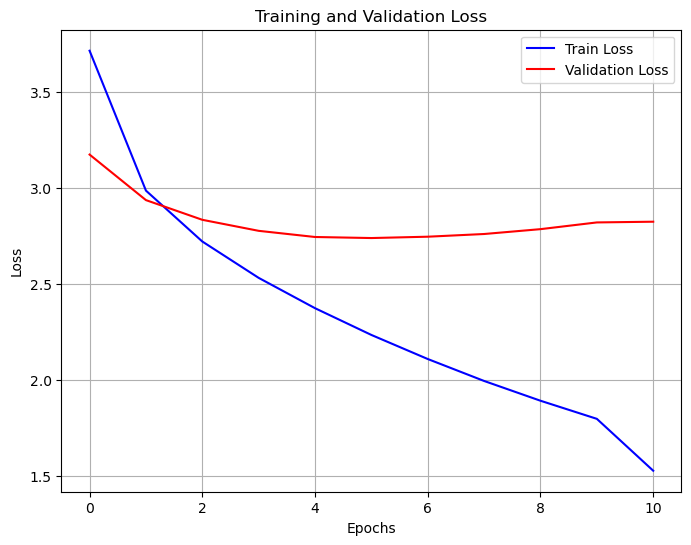

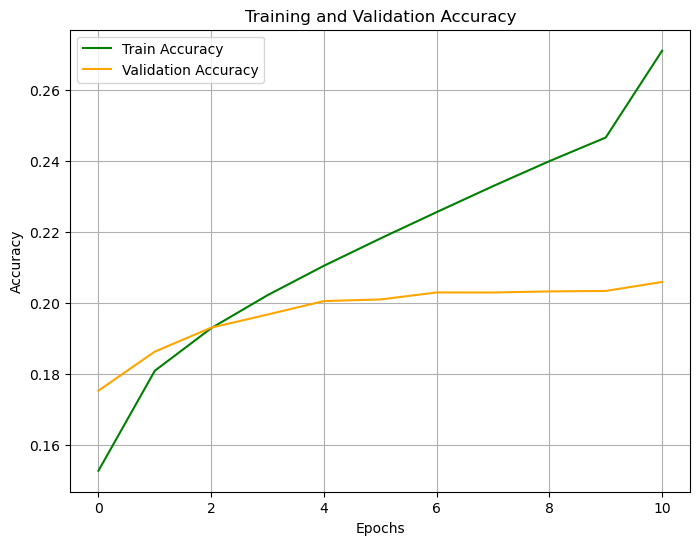

In [115]:
import matplotlib.pyplot as plt

# Loss 그래프
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label='Train Loss', color='blue')
plt.plot(val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy 그래프
plt.figure(figsize=(8, 6))
plt.plot(accuracy_history, label='Train Accuracy', color='green')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
# print top 5 of validation loss and accuracy and their indices
val_loss_history_tensor = torch.tensor(val_loss_history)
val_accuracy_history_tensor = torch.tensor(val_accuracy_history)
top_val_loss, top_val_loss_indices = torch.topk(val_loss_history_tensor, 5, largest=False)
top_val_accuracy, top_val_accuracy_indices = torch.topk(val_accuracy_history_tensor, 5, largest=True)
print("Top 5 Validation Loss:", top_val_loss, top_val_loss_indices)
print("Top 5 Validation Accuracy:", top_val_accuracy, top_val_accuracy_indices)

Top 5 Validation Loss: tensor([2.7373, 2.7427, 2.7443, 2.7583, 2.7749]) tensor([5, 4, 6, 7, 3])
Top 5 Validation Accuracy: tensor([0.2059, 0.2034, 0.2033, 0.2030, 0.2030]) tensor([10,  9,  8,  6,  7])


## 학습된 모델 저장 / epoch 늘려 이어서 학습

In [26]:
# 학습된 모델의 가중치 저장
torch.save(model.state_dict(), 'flickr8k_ImgCap_50epoch.pth')
print("Model saved successfully!")

Model saved successfully!


In [118]:
import torch
# 체크포인트 불러오기
checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/check2/checkpoint10_flickr8k_imgcap.pth')
model.load_state_dict(checkpoint['model_state_dict'])  # model weight
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Optimizer
start_epoch = checkpoint['epoch']   # epoch number
loss_history = checkpoint['train_loss_history'] 
accuracy_history = checkpoint['train_acc_history'] 
val_loss_history = checkpoint['val_loss_history']  
val_accuracy_history = checkpoint['val_acc_history'] 

print(f"Checkpoint loaded. Starting from epoch {start_epoch + 1}")


/tmp/ipykernel_3568558/566930662.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/check2/check

Checkpoint loaded. Starting from epoch 101


In [77]:
# 이어서 학습 수행
num_epochs = 30  # 총 에폭 수
loss_history, accuracy_history, val_loss_history, val_accuracy_history = train_model(
    model, 
    train_loader,
    val_loader,
    num_epochs, 
    start_epoch=start_epoch,  # 이어서 학습 시작
    loss_history=loss_history,  # 기존 history들 가져와 업데이트
    accuracy_history=accuracy_history,
    val_loss_history=val_loss_history, 
    val_accuracy_history=val_accuracy_history 
)

/tmp/ipykernel_3568558/764354036.py:45: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()   # Mixed Precision Training 사용


Epoch [25/30], Train Loss: 2.5611, Train Acc: 0.1963, Val Loss: 2.9597, Val Acc: 0.1902, Time: 90.45s
Checkpoint saved successfully as check2/checkpoint25_flickr8k_imgcap.pth!
Epoch [30/30], Train Loss: 2.5352, Train Acc: 0.1978, Val Loss: 2.9608, Val Acc: 0.1902, Time: 94.47s
Checkpoint saved successfully as check2/checkpoint30_flickr8k_imgcap.pth!


## 학습된 모델 평가 및 예시 실행 파트

In [107]:
def generate_caption(model, image_feature, word_index, max_length=30):
    """한 이미지에 대한 캡션 생성"""
    model.eval()
    
    sos_token = word_index['<sos>']
    eos_token = word_index['<eos>']
    
    # 단어 인덱스를 단어로 변환하는 딕셔너리
    index_to_word = {idx: word for word, idx in word_index.items()}
    
    with torch.no_grad():
        caption_ids = [sos_token]
        for i in range(max_length):
            # 현재까지의 캡션을 텐서로 변환
            caption_tensor = torch.tensor([caption_ids], dtype=torch.long).to(device)
            
            # 다음 단어 예측
            output = model(image_feature.unsqueeze(0).to(device), caption_tensor)
            predicted_word_id = output[:, -1, :].argmax(dim=1).item()
            
            # 종료 토큰이 나오면 중단
            if predicted_word_id == eos_token:
                break
                
            caption_ids.append(predicted_word_id)
    
    # 캡션 디코딩 (<sos>와 <eos> 제외)
    caption = [index_to_word.get(idx, '<UNK>') for idx in caption_ids[1:]]
    return ' '.join(caption)

### BLEU SCORE 계산

Starting test set evaluation with multiple captions...

Test Set Evaluation:
Average BLEU-1: 0.7232
Average BLEU-2: 0.5750
Average BLEU-3: 0.4398
Average BLEU-4: 0.3289
Total samples used for BLEU calculation: 4768


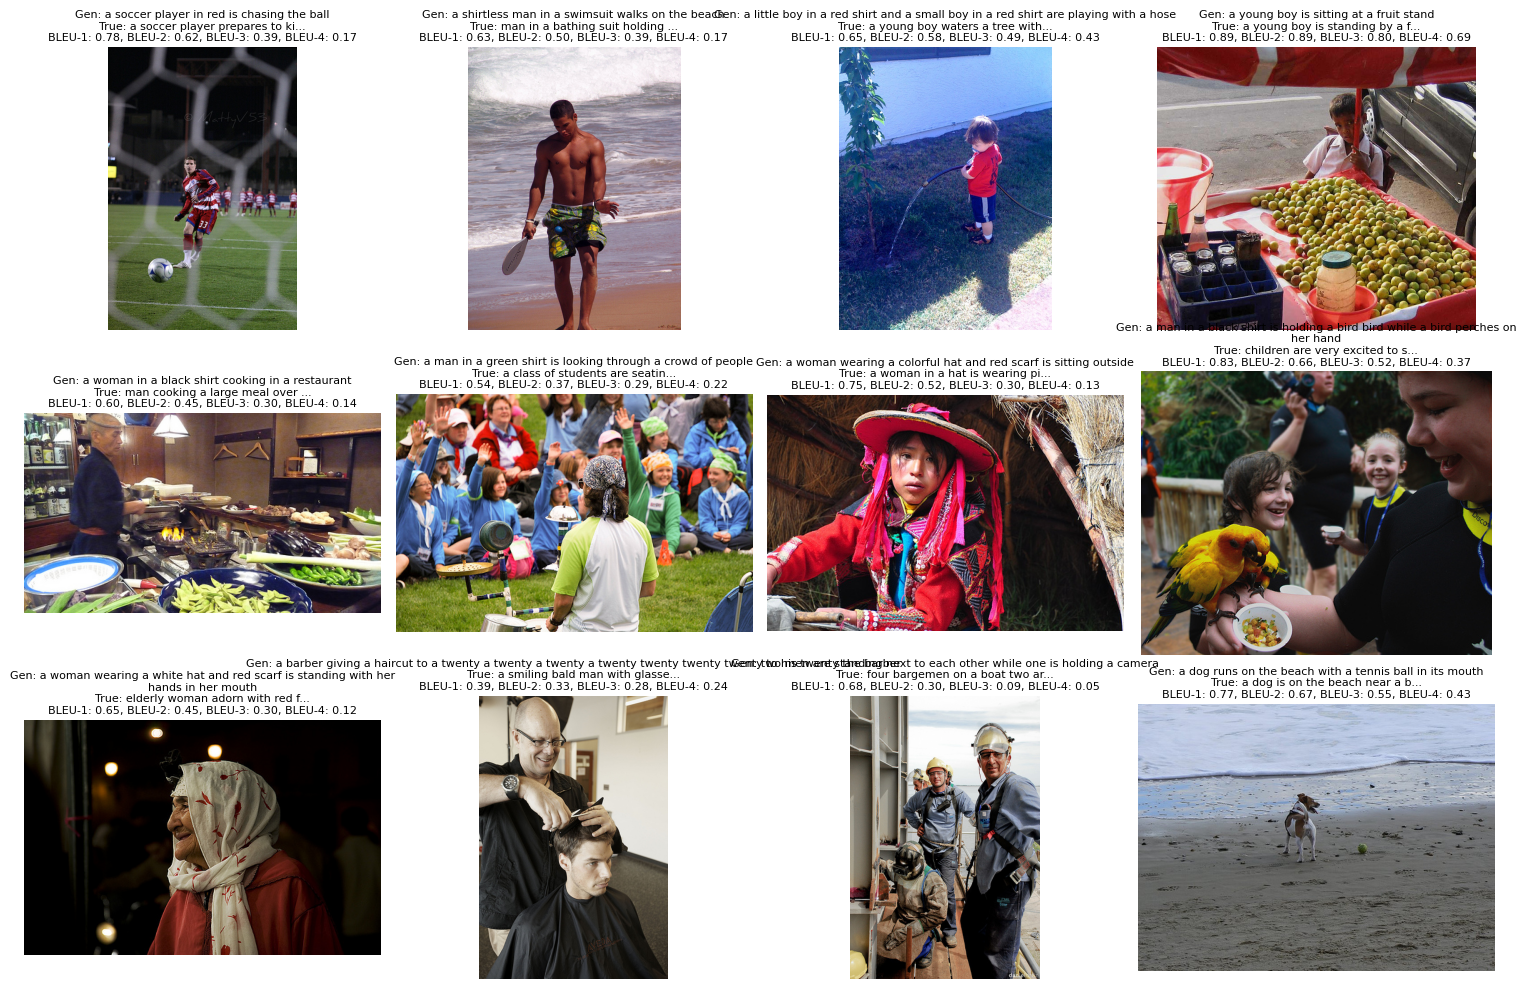

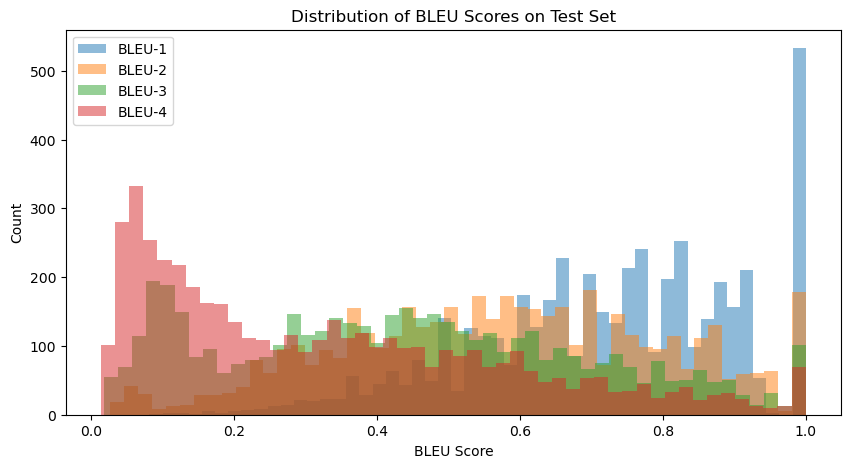

Loaded captions dictionary sample:
1000092795.jpg: ['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young , White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .']
10002456.jpg: ['Several men in hard hats are operating a giant pulley system .', 'Workers look down from up above on a piece of equipment .', 'Two men working on a machine wearing hard hats .', 'Four men on top of a tall structure .', 'Three men on a large rig .']
1000268201.jpg: ['A child in a pink dress is climbing up a set of stairs in an entry way .', 'A little girl in a pink dress going into a wooden cabin .', 'A little girl climbing the stairs to her playhouse .', 'A little girl climbing into a wooden playhouse ', 'A girl going into a wooden building .']
1000344755.jpg: ['Someone in a blue shirt and hat is standing on stair and leaning against a 

In [119]:
import torch
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

# CSV 파일 로드 및 캡션 딕셔너리 생성
def load_captions(csv_path):
    result_df = pd.read_csv(csv_path, sep="|", header=0, skipinitialspace=True)
    captions_dict = {}
    for _, row in result_df.iterrows():
        image = row['image_name']
        if image not in captions_dict:
            captions_dict[image] = []
        captions_dict[image].append(row['comment'])
    return captions_dict

# 평가 및 시각화 함수
def evaluate_and_visualize_with_multiple_captions(model, test_loader, word_index, device, image_dir, captions_dict, num_display=12):
    model.eval()
    index_to_word = {idx: word for word, idx in word_index.items()}
    all_bleu_scores = {'BLEU-1': [], 'BLEU-2': [], 'BLEU-3': [], 'BLEU-4': []}
    test_examples = []
    
    smoothing_function = SmoothingFunction().method1
    weights_list = {
        'BLEU-1': (1.0, 0.0, 0.0, 0.0),
        'BLEU-2': (0.5, 0.5, 0.0, 0.0),
        'BLEU-3': (0.33, 0.33, 0.33, 0.0),
        'BLEU-4': (0.25, 0.25, 0.25, 0.25)
    }
    
    with torch.no_grad():
        for batch_idx, (features, captions, image_names_batch) in enumerate(test_loader):
            features = features.to(device)
            captions = captions.to(device)
            
            for i in range(features.size(0)):  # 배치 크기만큼 반복
                # Get the image name
                image_name = image_names_batch[i]

                # 캡션 디코딩
                caption_indices = captions[i].cpu().tolist()
                true_caption = ' '.join(
                    index_to_word.get(idx, '<UNK>') for idx in caption_indices 
                    if idx != 0 and index_to_word.get(idx) not in ['<sos>', '<eos>']
                )

                # 캡션 생성
                generated_caption = generate_caption(model, features[i], word_index)

                # 다중 참조 캡션 가져오기
                references = [cap.lower().split() for cap in captions_dict.get(image_name, [])]
                candidate = generated_caption.lower().split()

                # Calculate BLEU scores
                bleu_scores = {}
                for ngram_label, weights in weights_list.items():
                    bleu_score = sentence_bleu(references, candidate, weights=weights, smoothing_function=smoothing_function) if references else 0
                    bleu_scores[ngram_label] = bleu_score
                    all_bleu_scores[ngram_label].append(bleu_score)

                # 테스트 예시 저장 (num_display 개수만큼만 저장)
                if len(test_examples) < num_display:
                    image_path = os.path.join(image_dir, image_name)
                    test_examples.append({
                        'image_path': image_path,
                        'generated': generated_caption,
                        'true': true_caption,
                        'bleu_scores': bleu_scores,
                    })
                # 추가적인 예시는 저장하지 않음
                
            # 루프를 종료하지 않고 전체 테스트 데이터 처리

    # 평균 BLEU 점수 출력
    avg_bleu_scores = {ngram_label: np.mean(scores) for ngram_label, scores in all_bleu_scores.items()}
    print("\nTest Set Evaluation:")
    for ngram_label, avg_score in avg_bleu_scores.items():
        print(f"Average {ngram_label}: {avg_score:.4f}")
        
    # 총 샘플 수 확인
    total_bleu_samples = len(all_bleu_scores['BLEU-1'])
    print(f"Total samples used for BLEU calculation: {total_bleu_samples}")

    # 결과 시각화 (num_display 개수만큼의 예시만 시각화)
    rows, cols = 3, 4  # 3줄, 한 줄에 4개
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, example in enumerate(test_examples):
        ax = axes[idx]
        img = Image.open(example['image_path'])
        ax.imshow(img)
        ax.axis('off')
        bleu_scores_str = ', '.join([f"{k}: {v:.2f}" for k, v in example['bleu_scores'].items()])
        ax.set_title(f"Gen: {example['generated']}\nTrue: {example['true'][:30]}...\n{bleu_scores_str}",
                     fontsize=8, wrap=True)
    
    for idx in range(len(test_examples), len(axes)):
        axes[idx].axis('off')  # 나머지 빈 칸 비활성화
    
    plt.tight_layout()
    plt.show()
    
    # BLEU 점수 분포 시각화
    plt.figure(figsize=(10, 5))
    for ngram_label in all_bleu_scores.keys():
        plt.hist(all_bleu_scores[ngram_label], bins=50, alpha=0.5, label=ngram_label)
    plt.title('Distribution of BLEU Scores on Test Set')
    plt.xlabel('BLEU Score')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    
    return avg_bleu_scores, all_bleu_scores


# CSV 경로와 디렉토리 경로 정의
csv_path = "/home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/results.csv"  # 캡션이 포함된 CSV 파일 경로
captions_dict = load_captions(csv_path)

# 테스트 실행
print("Starting test set evaluation with multiple captions...")
avg_bleu_scores, bleu_scores = evaluate_and_visualize_with_multiple_captions(
    model, test_loader, word_index, device, image_dir, captions_dict
)

# 디버깅 추가
print("Loaded captions dictionary sample:")
for key, value in list(captions_dict.items())[:5]:
    print(f"{key}: {value}")

print("Sorted image files sample:")
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
print(image_files[:5])

# 첫 이미지 매핑 테스트
test_image = image_files[0]
print(f"Test image: {test_image}")
print(f"Captions for {test_image}: {captions_dict.get(test_image)}")

# 총 샘플 수 확인
total_bleu_samples = len(bleu_scores['BLEU-1'])
print(f"Total samples used for BLEU calculation: {total_bleu_samples}")

### CIDEr Metric

In [75]:
import nltk
from nltk.tokenize import word_tokenize

try:
    word_tokenize("Test sentence for debugging.")
    print("Tokenization successful!")
except LookupError as e:
    print("Error:", e)
    print("NLTK data path:", nltk.data.path)

Tokenization successful!


[nltk_data] Downloading package punkt_tab to /home/gpu_04/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Starting CIDEr evaluation...
Calculating CIDEr scores...

CIDEr Metric Evaluation:
Average CIDEr Score: 0.9766


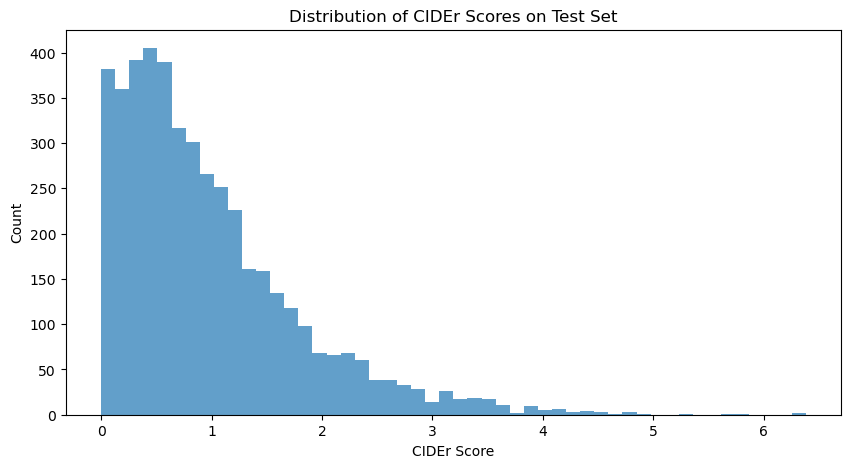


Example Generations:

Example 1
Image Path: /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/3363836972.jpg
Generated Caption: a soccer player in red is chasing the ball
References: ['Man in red , white and blue sport uniform on field with soccer ball above ground in front of him .', 'A soccer player kicks a ball into the unmanned goal .', 'View of a soccer ball being kicked into a goal net', 'A soccer player prepares to kick the ball .', 'a soccer player kicking a goal in']

Example 2
Image Path: /home/gpu_04/jw2020/ImageCaptioning/flickr30k_data/Images/233270519.jpg
Generated Caption: a shirtless man in a swimsuit walks on the beach
References: ['A man in swim trunks hits a ball with a paddle , while on the beach .', 'The man is standing on the shore hitting a ball with a paddle .', 'a muscular man in swim trunks plays paddle ball on the beach', 'A man is batting a ball on the beach beside the ocean .', 'Man in a bathing suit holding a paddle on the beach']

Example 3
Image

In [120]:
from pycocoevalcap.cider.cider import Cider
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import os
import torch
from nltk.tokenize import word_tokenize

# NLTK 데이터 다운로드
nltk.download('punkt_tab')

# 캡션 전처리 함수
def preprocess_caption(caption):
    # 소문자 변환
    caption = caption.lower()
    # 특수문자 제거
    caption = re.sub(r'[^\w\s]', '', caption)
    # 토크나이즈
    tokens = word_tokenize(caption)
    # 문자열로 다시 결합
    return ' '.join(tokens)

# CIDEr 평가 함수
def evaluate_and_visualize_with_cider(model, test_loader, word_index, device, image_dir, captions_dict, num_display=5):
    """
    CIDEr 점수 계산 및 결과 시각화

    Args:
        model: 캡션 생성 모델
        test_loader: 테스트 데이터 로더
        word_index: 단어-인덱스 매핑
        device: PyTorch 디바이스 (CPU/GPU)
        image_dir: 이미지 디렉토리 경로
        captions_dict: 이미지 이름과 참조 캡션 매핑 딕셔너리
        num_display: 시각화할 이미지 수
    """
    model.eval()
    index_to_word = {idx: word for word, idx in word_index.items()}
    results = []
    test_examples = []
    
    with torch.no_grad():
        for batch_idx, (features, captions, image_names_batch) in enumerate(test_loader):
            features = features.to(device)
            
            for i in range(features.size(0)):  # 배치 크기만큼 반복
                # Get the image name
                image_name = image_names_batch[i]

                # 캡션 생성
                generated_caption = generate_caption(model, features[i], word_index)
                # 전처리된 캡션
                generated_caption_proc = preprocess_caption(generated_caption)

                # 참조 캡션 가져오기 및 전처리
                references = captions_dict.get(image_name, [])
                references_proc = [preprocess_caption(ref) for ref in references]

                # 평가 데이터 준비
                results.append({
                    "image_id": image_name,
                    "candidate": generated_caption_proc,
                    "references": references_proc
                })

                # 테스트 예시 저장 (num_display 개수만 저장)
                if len(test_examples) < num_display:
                    image_path = os.path.join(image_dir, image_name)
                    test_examples.append({
                        "image_path": image_path,
                        "generated": generated_caption,
                        "references": references
                    })
    
    # CIDEr 점수 계산
    print("Calculating CIDEr scores...")
    cider_scorer = Cider()
    
    # gts와 res 딕셔너리 생성
    gts = {}
    res = {}
    for res_item in results:
        image_id = res_item["image_id"]
        gts[image_id] = res_item["references"]  # 리스트 형태의 참조 캡션들
        res[image_id] = [res_item["candidate"]]  # 생성된 캡션을 리스트로 감싸서 전달

    # CIDEr 점수 계산
    cider_score, cider_scores = cider_scorer.compute_score(gts, res)
    
    avg_cider_score = cider_score  # 평균 CIDEr 점수
    print(f"\nCIDEr Metric Evaluation:")
    print(f"Average CIDEr Score: {avg_cider_score:.4f}")

    # CIDEr 점수 분포 시각화
    plt.figure(figsize=(10, 5))
    plt.hist(cider_scores, bins=50, alpha=0.7)
    plt.title("Distribution of CIDEr Scores on Test Set")
    plt.xlabel("CIDEr Score")
    plt.ylabel("Count")
    plt.show()

    # 예시 출력
    print("\nExample Generations:")
    for idx, example in enumerate(test_examples):
        print(f"\nExample {idx + 1}")
        print(f"Image Path: {example['image_path']}")
        print(f"Generated Caption: {example['generated']}")
        print(f"References: {example['references']}")

    return avg_cider_score, cider_scores

# CIDEr 평가 실행
print("Starting CIDEr evaluation...")
avg_cider_score, cider_scores = evaluate_and_visualize_with_cider(
    model, test_loader, word_index, device, image_dir, captions_dict
)

print(f"Average CIDEr Score: {avg_cider_score:.4f}")
print(f"Total samples used for CIDEr calculation: {len(cider_scores)}")